# Final Project: Soccer Injury Trends and Recovery Analysis

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$
### Introduction
This project investigates whether recent advancements in technology and medical science have reduced soccer players' recovery times and how injury rates have changed over the years.

### Goals
1. Analyze trends in recovery times over time.
2. Examine how injury rates have evolved.
3. Identify patterns in injury types and their impact on recovery.

## Name: <span style="color:blue"> *Long Duong (Billy)* </span>

### Step 1: Data Loading and Merging


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Injuries.csv'
injuries_df = pd.read_csv(file_path)


In [3]:
# Display the first few rows of the dataset
injuries_df.head()


,Season,Injury,from,until,Days,Games missed,player_name,player_id,url_injuries
0,23/24,Adductor injury,"Jul 10, 2023","Oct 8, 2023",90 days,11,Ricardo Mangas,314944,https://www.transfermarkt.co.uk/ricardo-mangas...
1,20/21,unknown injury,"Apr 7, 2021","Apr 29, 2021",22 days,4,Ricardo Mangas,314944,https://www.transfermarkt.co.uk/ricardo-mangas...
2,18/19,unknown injury,"Apr 26, 2019","May 18, 2019",22 days,2,Lassana Faye,315129,https://www.transfermarkt.co.uk/lassana-faye/v...
3,18/19,Muscle injury,"Apr 11, 2019","Apr 18, 2019",7 days,1,Lassana Faye,315129,https://www.transfermarkt.co.uk/lassana-faye/v...
4,20/21,Ankle surgery,"Dec 16, 2020","Jun 30, 2021",196 days,24,Mink Peeters,315149,https://www.transfermarkt.co.uk/mink-peeters/v...


In [4]:
# Basic information about the dataset
injuries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107971 entries, 0 to 107970
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Season        107971 non-null  object
 1   Injury        107971 non-null  object
 2   from          107971 non-null  object
 3   until         107971 non-null  object
 4   Days          107971 non-null  object
 5   Games missed  107971 non-null  object
 6   player_name   107971 non-null  object
 7   player_id     107971 non-null  int64 
 8   url_injuries  107971 non-null  object
dtypes: int64(1), object(8)
memory usage: 7.4+ MB


In [5]:
# Statistical summary of numerical columns
injuries_df.describe()

,player_id
count,1.079710e+05
mean,1.740821e+05
std,1.621340e+05
min,1.000000e+01
25%,4.628600e+04
50%,1.235130e+05
75%,2.599530e+05
max,1.103981e+06


In [6]:
# Check for missing values
injuries_df.isnull().sum()

Season          0
Injury          0
from            0
until           0
Days            0
Games missed    0
player_name     0
player_id       0
url_injuries    0
dtype: int64

In [7]:
# Handle non-numeric or unexpected values in 'Days' column
injuries_df['Days'] = injuries_df['Days'].str.replace(' days', '', regex=False)
injuries_df['Days'] = pd.to_numeric(injuries_df['Days'], errors='coerce')

In [8]:
# Convert 'Games missed' to numeric values
injuries_df['Games missed'] = pd.to_numeric(injuries_df['Games missed'], errors='coerce')

In [9]:
# Drop rows with NaN values after conversion
injuries_df.dropna(subset=['Days', 'Games missed'], inplace=True)

In [10]:
# Display the cleaned dataset
injuries_df.head()

,Season,Injury,from,until,Days,Games missed,player_name,player_id,url_injuries
0,23/24,Adductor injury,"Jul 10, 2023","Oct 8, 2023",90.0,11.0,Ricardo Mangas,314944,https://www.transfermarkt.co.uk/ricardo-mangas...
1,20/21,unknown injury,"Apr 7, 2021","Apr 29, 2021",22.0,4.0,Ricardo Mangas,314944,https://www.transfermarkt.co.uk/ricardo-mangas...
2,18/19,unknown injury,"Apr 26, 2019","May 18, 2019",22.0,2.0,Lassana Faye,315129,https://www.transfermarkt.co.uk/lassana-faye/v...
3,18/19,Muscle injury,"Apr 11, 2019","Apr 18, 2019",7.0,1.0,Lassana Faye,315129,https://www.transfermarkt.co.uk/lassana-faye/v...
4,20/21,Ankle surgery,"Dec 16, 2020","Jun 30, 2021",196.0,24.0,Mink Peeters,315149,https://www.transfermarkt.co.uk/mink-peeters/v...


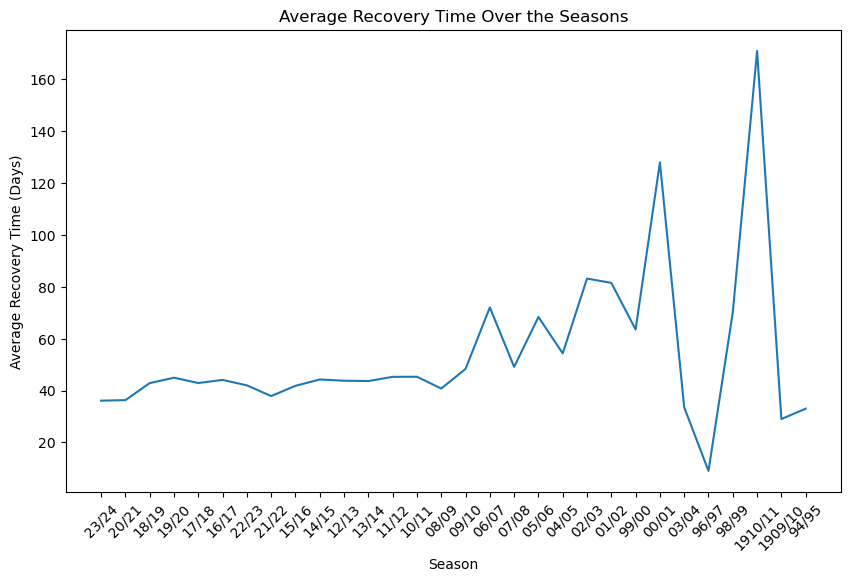

In [11]:
# 1. Analyze Trends in Recovery Times
plt.figure(figsize=(10, 6))
sns.lineplot(data=injuries_df, x='Season', y='Days', errorbar=None)
plt.title('Average Recovery Time Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Average Recovery Time (Days)')
plt.xticks(rotation=45)
plt.show()

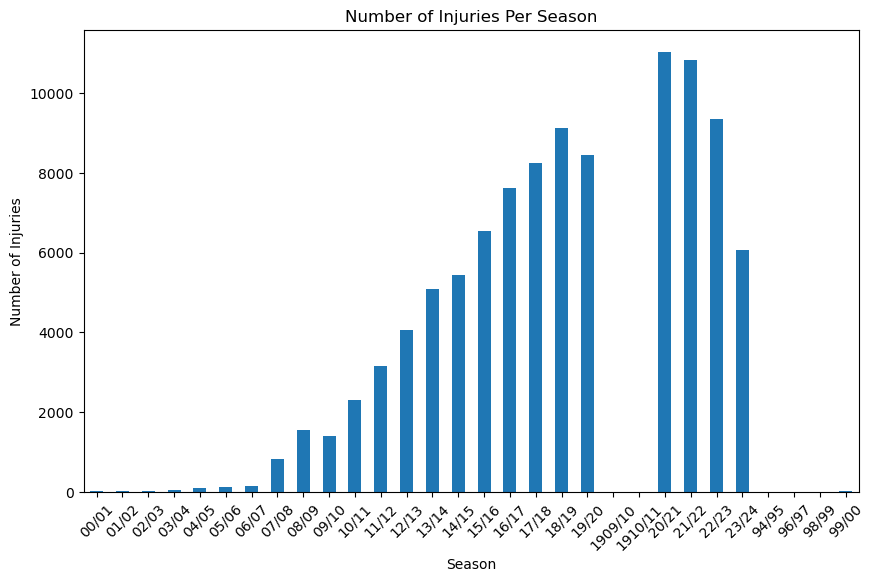

In [12]:
# 2. Examine Injury Rates Over Seasons
injury_counts = injuries_df['Season'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar')
plt.title('Number of Injuries Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.show()

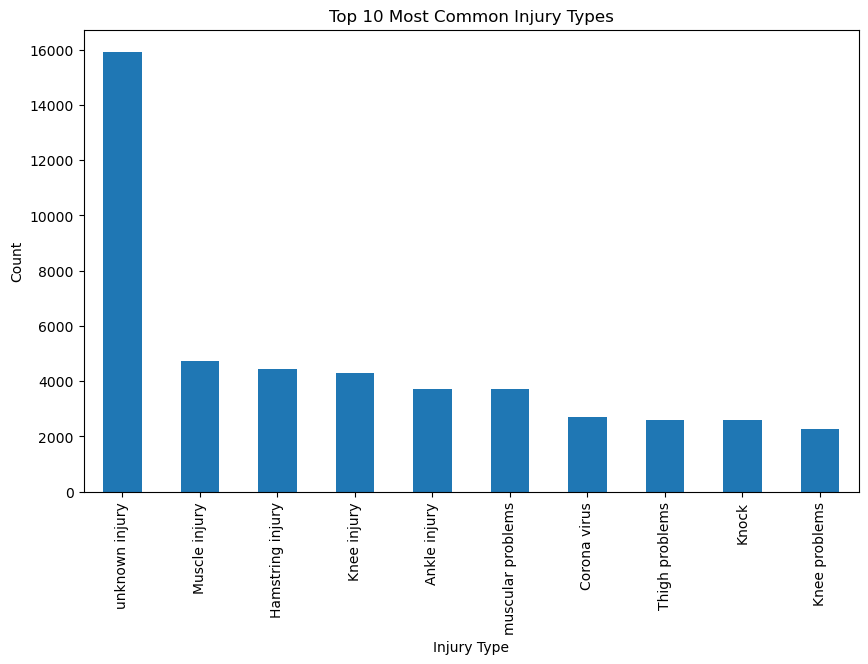

In [13]:
# 3. Patterns in Injury Types
injury_type_counts = injuries_df['Injury'].value_counts()
plt.figure(figsize=(10, 6))
injury_type_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.show()

In [14]:
# Save the cleaned dataset for future analysis
injuries_df.to_csv('cleaned_injuries.csv', index=False)
